In [2]:
import numpy as np
import matplotlib.pyplot as plt

# PCA

In [3]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200, 1)
y = y.reshape(200,1)


In [4]:
xy = np.hstack([x, y])
xy.shape


(200, 2)

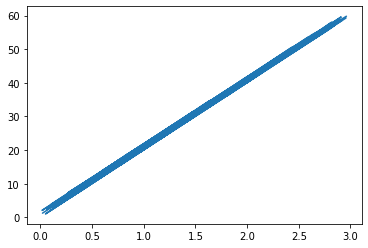

In [5]:
plt.plot(xy[:,0], xy[:,1], '-')
plt.show()

In [6]:
xy_centrado = xy - np.mean(xy, axis = 0)

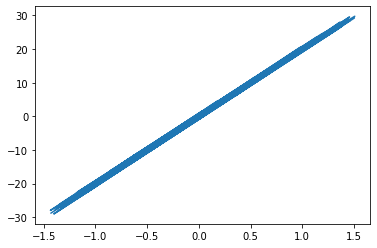

In [7]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '-')
plt.show()


In [8]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
autovectores

array([[-0.99875285, -0.04992746],
       [ 0.04992746, -0.99875285]])

# Usando la pseudoinversa

(-6.0, 6.0)

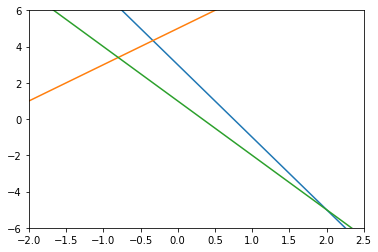

In [9]:
x = np.linspace(-5, 5, 1000)

y_1 = -4*x + 3
y_2 =  2*x + 5
y_3 = -3*x + 1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

In [10]:
matriz = np.array([[1, 2], [3, 4], [5, 6]])
print(matriz)

[[1 2]
 [3 4]
 [5 6]]


In [11]:
matriz_pse = np.linalg.pinv(matriz)
matriz_pse

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])

In [12]:
b = np.array([[3], [5], [1]])
b

array([[3],
       [5],
       [1]])

In [13]:
resultado = matriz_pse.dot(b)
resultado


array([[-5. ],
       [ 4.5]])

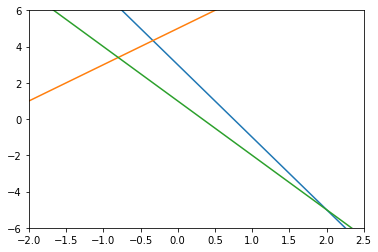

In [14]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.scatter(resultado[0], resultado[1])

plt.show()

## SVD

In [16]:
import numpy as np

np.set_printoptions(suppress=True) #que no nos muestre los numero que son muy cercanos a 0. queremos verlo como 0 para que no induzca errores

In [17]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
U, D, V =np.linalg.svd(A)
print('U')
print(U)
print('D')
print(D)
print('V')
print(V)

U
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
D
[9.52551809 0.51430058]
V
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [19]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
print(D_pse)

[[0. 0. 0.]
 [0. 0. 0.]]


In [20]:
print('Valores a reemplazar en D_pse')
print(D_pse[:D.shape[0], :D.shape[0]])

Valores a reemplazar en D_pse
[[0. 0.]
 [0. 0.]]


In [21]:
print('Valores que pondremos en D_pse')
print(np.linalg.inv(np.diag(D)))

Valores que pondremos en D_pse
[[0.10498117 0.        ]
 [0.         1.94438824]]


In [22]:
print('D_pse')
D_pse[:D.shape[0], :D.shape[0]]=np.linalg.inv(np.diag(D))

D_pse


In [23]:
print(D_pse)

[[0.10498117 0.         0.        ]
 [0.         1.94438824 0.        ]]


In [24]:
A_pse = V.T.dot(D_pse).dot(U.T)
A_pse

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])

In [25]:
A_pse_calc = np.linalg.pinv(A)
A_pse_calc

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])

In [26]:
print(A_pse.dot(A))

[[ 1.  0.]
 [-0.  1.]]


In [27]:
np.set_printoptions(suppress = True)
print(A_pse.dot(A))

[[ 1.  0.]
 [-0.  1.]]


In [28]:
print(A.dot(A_pse))

[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


In [29]:
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_pse_2

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])

In [30]:
A_pse

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])